In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyvincent/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyvincent/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('/Users/anthonyvincent/Downloads/Apple-Twitter-Sentiment-DFE.csv', encoding = 'iso-8859-1')
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [4]:
data.loc[data['sentiment'] == 'not_relevant', 'sentiment'] = -1
data['sentiment'] = data['sentiment'].astype(int)

In [5]:
#To predict the Sentiment as positive(numerical value = 1) or 
#negative(numerical value = 0), we need to change them the values
#to those categories. For that the condition will be like if the
#sentiment value is less than or equal to 3, then it is negative(0) else positive(1). 

In [6]:
#1,2,3->negative(i.e 0)
data.loc[data['sentiment']<=3,'sentiment'] = 0
 
#4,5->positive(i.e 1)
data.loc[data['sentiment']>3,'sentiment'] = 1

In [7]:
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
 
data['text']=data['text'].apply(clean_review)

In [8]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,0,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,0,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had Mini-Flash ...
2,623495515,True,golden,10,NaN,0,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat chews @apple cords. Such #AppleSnob.
3,623495516,True,golden,17,NaN,0,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree @jimcramer #IndividualInvestor trade #...
4,623495517,False,finalized,3,12/12/14 12:14,0,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects Spanish Inquisition #AAPL


In [9]:
data[['sentiment','text']]
#creation of a new datafram that extracts both the sentiment and text columns that are called

,sentiment,text
0,0,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,0,RT @JPDesloges: Why AAPL Stock Had Mini-Flash ...
2,0,My cat chews @apple cords. Such #AppleSnob.
3,0,I agree @jimcramer #IndividualInvestor trade #...
4,0,Nobody expects Spanish Inquisition #AAPL
...,...,...
3881,0,(Via FC) Apple Is Warming Up To Social Media -...
3882,0,RT @MMLXIV: avocado emoji may I ask @apple
3883,1,@marcbulandr I could agree more. Between @Appl...
3884,0,My iPhone 5's photos longer downloading automa...


In [10]:
data['sentiment'].value_counts() #counts the number of sentiment values for negative(the numbner zero) and positive(the number 1)

0    3463
1     423
Name: sentiment, dtype: int64

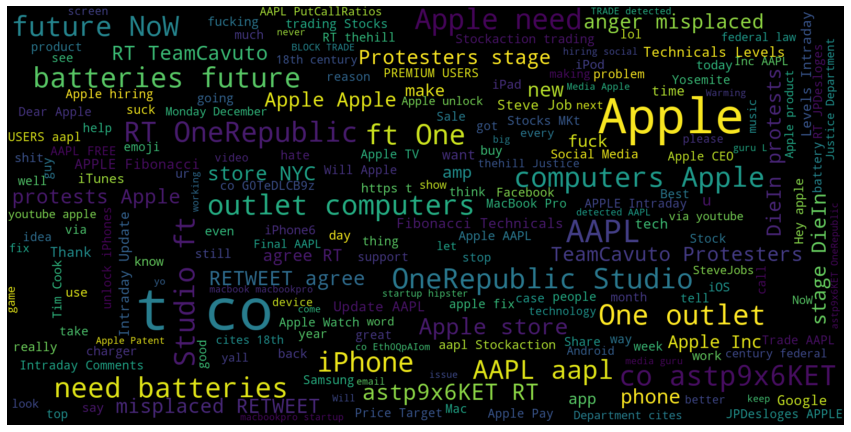

In [11]:
consolidated=' '.join(word for word in data['text'][data['sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()
#displays and generates a word cloud visualization of the data's text 
#calls the text data from the "text" column and where the sentiment label in the data frame is called sentiment

TF-IDF calculates that how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set). We will be implementing this with the code below.

In [13]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['text'] ).toarray()

In [14]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
 
#Model fitting
model.fit(x_train,y_train)
 
#testing the model
pred=model.predict(x_test)
 
#model accuracy
print(accuracy_score(y_test,pred))

0.8827160493827161


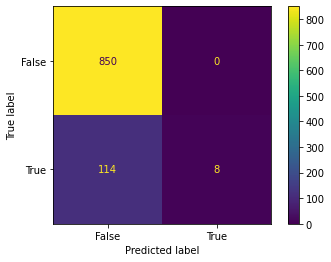

In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

In [17]:
#Plot a cloud of Negative Tweets

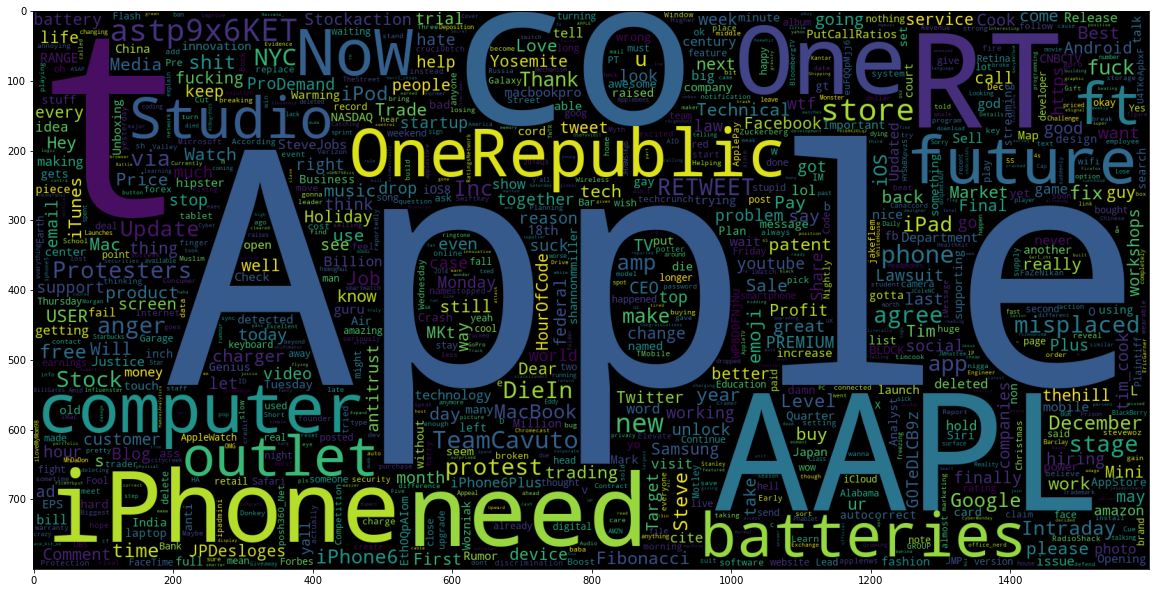

In [18]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [19]:
#Plot a cloud of Positive Tweets

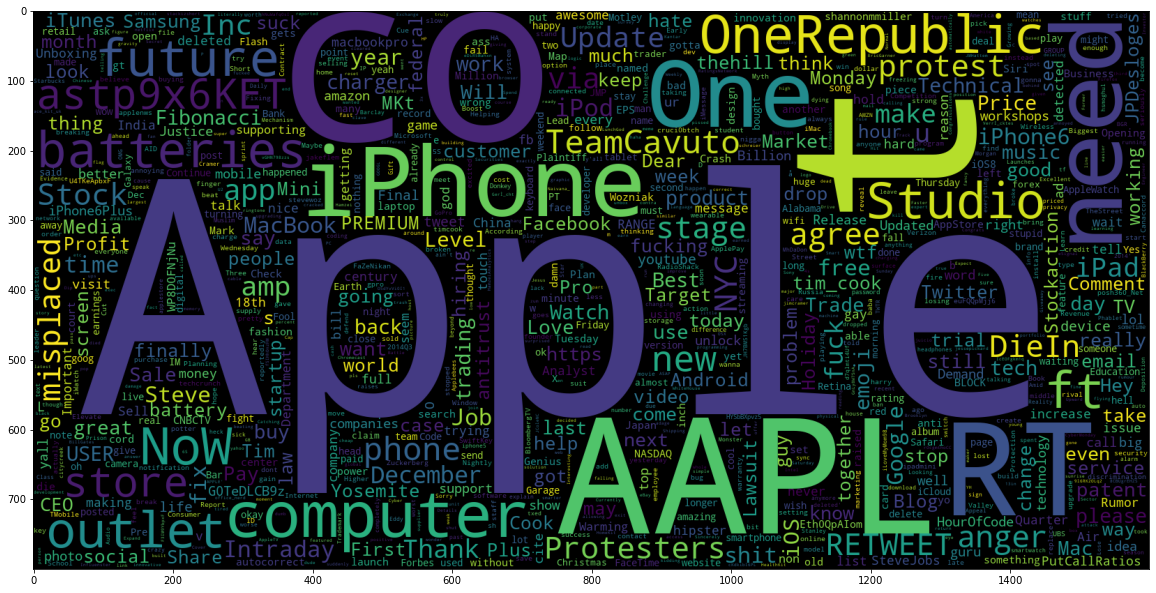

In [20]:
data_pos = data['text'][:800000]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)